<a href="https://colab.research.google.com/github/mtrentz/puzzle_circulos/blob/main/puzzle_circulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -qq data.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing, Sequential, Input
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(
    # featurewise_std_normalization = True,
    # samplewise_std_normalization = True,
    rotation_range = 5,
    # zca_whitening = True,
    brightness_range=(0.4,1.0),
    shear_range = 0.1,
    rescale = 1./255,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(42,110),
    color_mode='rgb',
    batch_size=50
)

Found 21 images belonging to 7 classes.


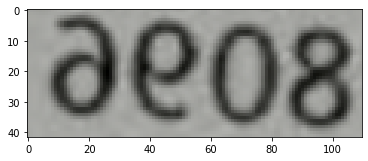

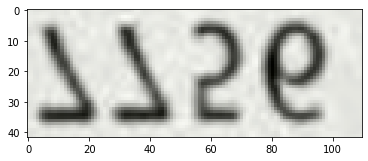

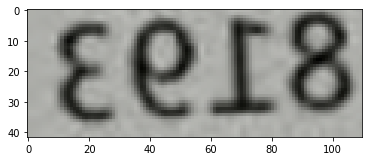

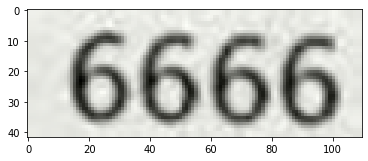

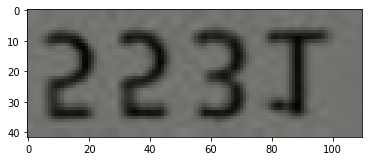

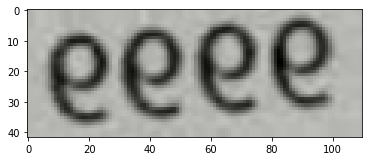

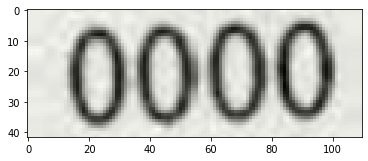

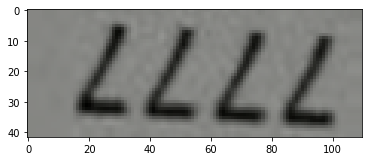

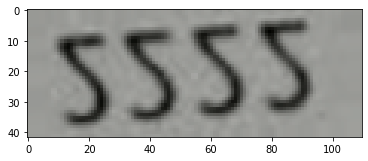

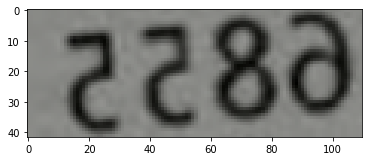

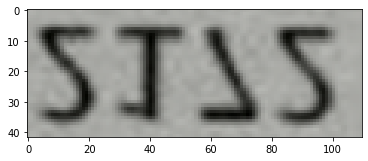

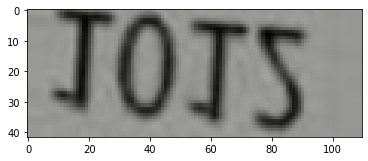

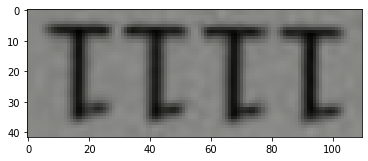

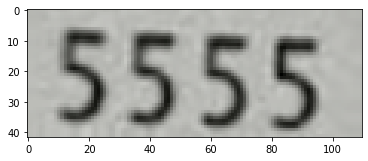

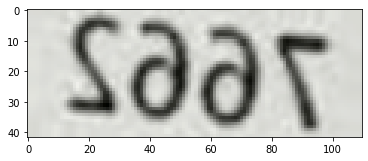

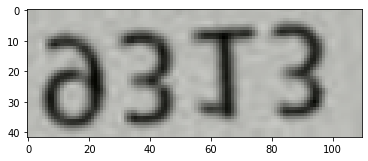

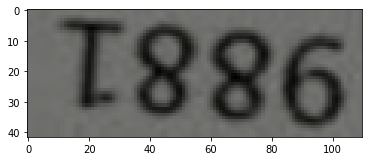

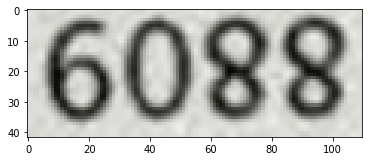

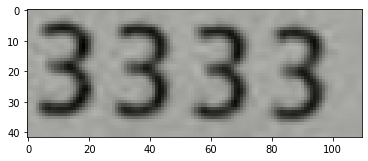

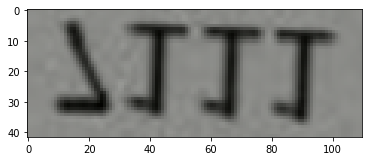

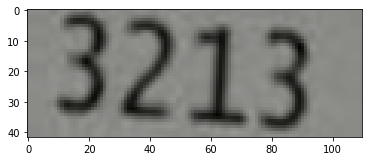

In [ ]:
batch = next(train_generator)

for i in range(len(batch[0])):
  img = batch[0][i]
  plt.imshow(img)
  plt.show()


In [ ]:
model = Sequential()
model.add(VGG16(include_top=False, input_shape=(42,110,3)))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.2),)
model.add(layers.Dense(256, activation="softmax"))
# model.add(layers.Dropout(0.2),)
model.add(layers.Dense(64, activation="softmax"))
# model.add(layers.Dropout(0.2),)
model.add(layers.Dense(7, activation="softmax"))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 3, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 1536)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               393472    
                                                                 
 dense_25 (Dense)            (None, 64)                16448     
                                                                 
 dense_26 (Dense)            (None, 7)                 455       
                                                                 
Total params: 15,125,063
Trainable params: 15,125,063
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

callbacks = [ tf.keras.callbacks.EarlyStopping(patience=100, monitor='accuracy'),]

history = model.fit(train_generator,epochs=500, batch_size=50, callbacks=callbacks)

Epoch 1/500
1/1 [==============================] - 1s 949ms/step - loss: 1.9499 - accuracy: 0.0476
Epoch 2/500
1/1 [==============================] - 0s 118ms/step - loss: 1.9484 - accuracy: 0.0476
Epoch 3/500
1/1 [==============================] - 0s 125ms/step - loss: 1.9460 - accuracy: 0.0476
Epoch 4/500
1/1 [==============================] - 0s 118ms/step - loss: 1.9446 - accuracy: 0.0476
Epoch 5/500
1/1 [==============================] - 0s 114ms/step - loss: 1.9432 - accuracy: 0.0952
Epoch 6/500
1/1 [==============================] - 0s 107ms/step - loss: 1.9418 - accuracy: 0.4286
Epoch 7/500
1/1 [==============================] - 0s 103ms/step - loss: 1.9404 - accuracy: 0.4286
Epoch 8/500
1/1 [==============================] - 0s 112ms/step - loss: 1.9390 - accuracy: 0.4286
Epoch 9/500
1/1 [==============================] - 0s 99ms/step - loss: 1.9376 - accuracy: 0.4286
Epoch 10/500
1/1 [==============================] - 0s 99ms/step - loss: 1.9362 - accuracy: 0.4286
Epoch 11/50

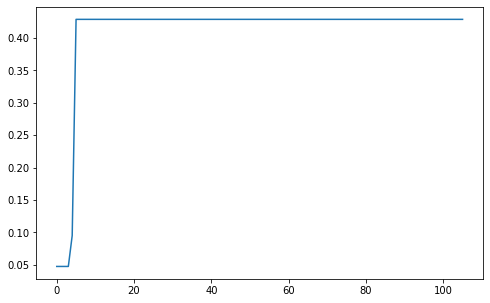

In [ ]:
import pandas as pd
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.show()

In [ ]:
img = preprocessing.image.load_img('data/2581.png', color_mode='rgb', target_size=(42,110))
# img = preprocessing.image.load_img('data/train/1/1012.png', color_mode='grayscale', target_size=(110,42))
# img = preprocessing.image.load_img('data/train/5/9881.png', color_mode='grayscale', target_size=(110,42))
# img = preprocessing.image.img_to_array(img)
# img = np.expand_dims(img, axis=0)

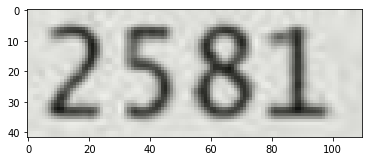

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img_data = preprocessing.image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)

In [ ]:
list(model.predict(img_data)[0])

[0.18913342,
 0.17501985,
 0.124224976,
 0.122432634,
 0.14299664,
 0.12577449,
 0.12041804]